# Exploratory Data Analysis on Spotify 2023 Dataset

In [2]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
sptfy23 = pd.read_excel('spotify-2023.xlsx') #convert csv to xlsx
sptfy23

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
print(sptfy23.info()) #display the dataset's structure  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

## GUIDE QUESTIONS
You are expected to answer the following questions using your analysis:



### Overview of Dataset

##### 1. How many rows and columns does the dataset contain?

In [8]:
#show the dimensions of the datasets: (row, cols)
dimension = sptfy23.shape
dimension

(953, 24)

##### 2.1. What are the data types of each column?

In [10]:
#show the datatypes for each cols
datatype = sptfy23.dtypes
datatype

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

##### 2.2. Are there any missing values?

In [12]:
def missing_values(sptfy_dataset):
    for column in sptfy_dataset.columns: #iterate over each column
        missing_count = sptfy_dataset[column].isna().sum() #calculate the no. of missing values
        if missing_count > 0: #if there is, then proceed
            percentage_missing = (missing_count / len(sptfy_dataset)) * 100 #calculate %
            print(f" For column, {column}: There are {missing_count} missing values, which is {percentage_missing:.2f}% of the total entries.")
            #string all the infos together and print

missing_values(sptfy23) #call the function to display

 For column, in_shazam_charts: There are 50 missing values, which is 5.25% of the total entries.
 For column, key: There are 95 missing values, which is 9.97% of the total entries.


### Basic Descriptive Statistics

##### 3. What are the mean, median, and standard deviation of the streams column?

In [15]:
def convertion(columns):
    for col in columns: #iterate over each column 
        sptfy23[col] = pd.to_numeric(sptfy23[col], errors='coerce')  #convert to numeric; set non-numeric entries to NaN
        sptfy23.dropna(subset=[col], inplace=True)  #remove rows with non-numeric entries (NaN)
        sptfy23[col] = sptfy23[col].astype('int64')  #convert the data to int64

cols = ['streams']  #store the list of columns to be converted in 'cols'
convertion(cols)  #call the function

sptfy23.dtypes  #display the converted data types of each cols

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [16]:
streams_mean = sptfy23['streams'].mean()  #compute mean of streams
streams_median = sptfy23['streams'].median()  #compute median of streams
streams_std = sptfy23['streams'].std()  #compute standard deviations of streams

#display results
print("Mean: ", streams_mean)
print("Median: ", streams_median)
print("Standard Deviation: ", streams_std)

Mean:  514137424.93907565
Median:  290530915.0
Standard Deviation:  566856949.0388832


##### 4.1. What is the distribution of released_year and artist_count?

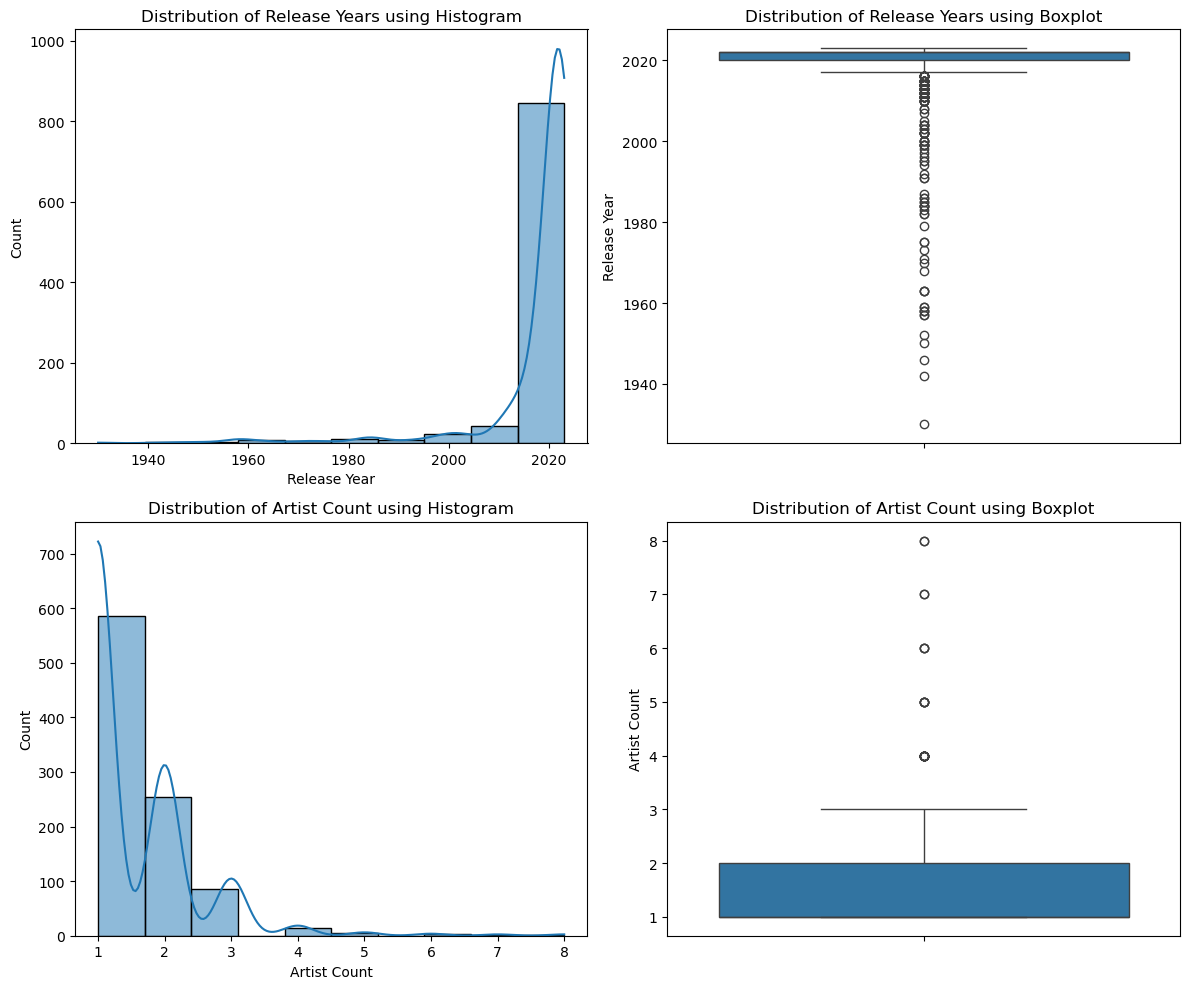

In [18]:
#create a histogram and boxplot to show distribution
plt.figure(figsize=(12,10))    

#histogram of released year
plt.subplot(2,2,1)
sns.histplot(sptfy23['released_year'], bins=10, kde=True)
plt.title("Distribution of Release Years using Histogram")
plt.xlabel("Release Year")
plt.ylabel("Count")

#boxplot of released year
plt.subplot(2,2,2)
sns.boxplot(sptfy23['released_year'])
plt.title("Distribution of Release Years using Boxplot")
plt.ylabel("Release Year")

#histogram of artist count
plt.subplot(2,2,3)
sns.histplot(sptfy23['artist_count'], bins=10, kde=True)
plt.title("Distribution of Artist Count using Histogram")
plt.xlabel("Artist Count")
plt.ylabel("Count")

#boxplot of artist count
plt.subplot(2,2,4)
sns.boxplot(sptfy23['artist_count'])
plt.title("Distribution of Artist Count using Boxplot")
plt.ylabel("Artist Count")

#display the graphs
plt.tight_layout()
plt.show()

##### 4.2. Are there any noticeable trends or outliers? 

In [20]:
#create a summary of the statistics for 'released_year'
released_year_stats = sptfy23['released_year'].describe()

#display the results
print("Released Year")
print(released_year_stats)

Released Year
count     952.000000
mean     2018.288866
std        11.011397
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64


In [21]:
#create a summary of the statistics for 'artist_count'
artist_count_stats = sptfy23['artist_count'].describe()

#display results
print("Artist Count")
print(artist_count_stats)

Artist Count
count    952.000000
mean       1.556723
std        0.893331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


### Top Performers

##### 5. Which track has the highest numbers of stream? Display the top 5 most streamed tracks.

In [24]:
#sort the dataset by the 'streams' cols in descending order
high_streams = sptfy23.sort_values(by='streams', ascending=False)

#display the first five rows of the data set
high_streams.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


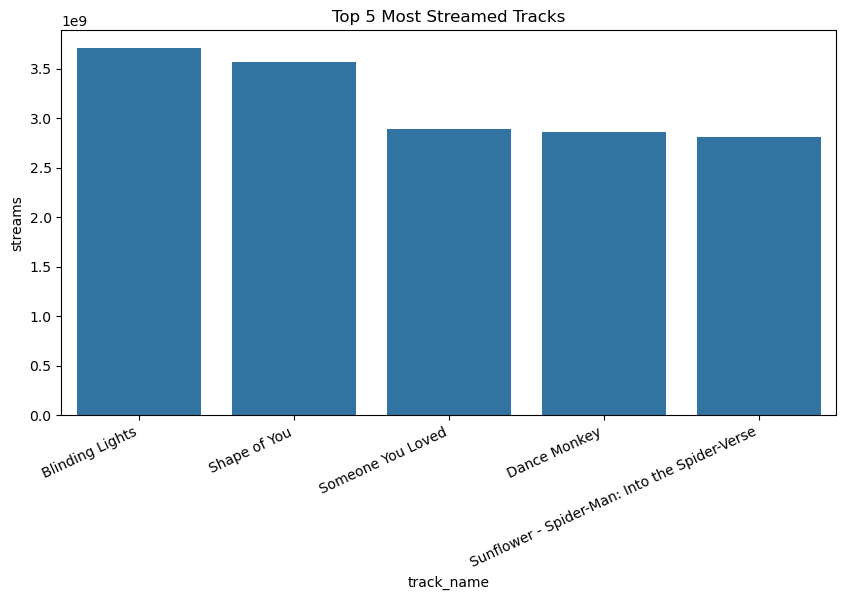

1. Blinding Lights with a total of 3703895074 streams.
2. Shape of You with a total of 3562543890 streams.
3. Someone You Loved with a total of 2887241814 streams.
4. Dance Monkey with a total of 2864791672 streams.
5. Sunflower - Spider-Man: Into the Spider-Verse with a total of 2808096550 streams.


In [25]:
#create a barplot to visualize the data above
plt.figure(figsize=(10,5))
plt.title("Top 5 Most Streamed Tracks")

sns.barplot(x="track_name", y="streams", data = high_streams.head())
plt.xticks(rotation=25, ha="right", fontsize=10)

plt.show()

#display the exact values for each bar below
for i, (index, row) in enumerate(high_streams.head().iterrows(), start=1):
    print(f"{i}. {row['track_name']} with a total of {row['streams']} streams.")

##### 6. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

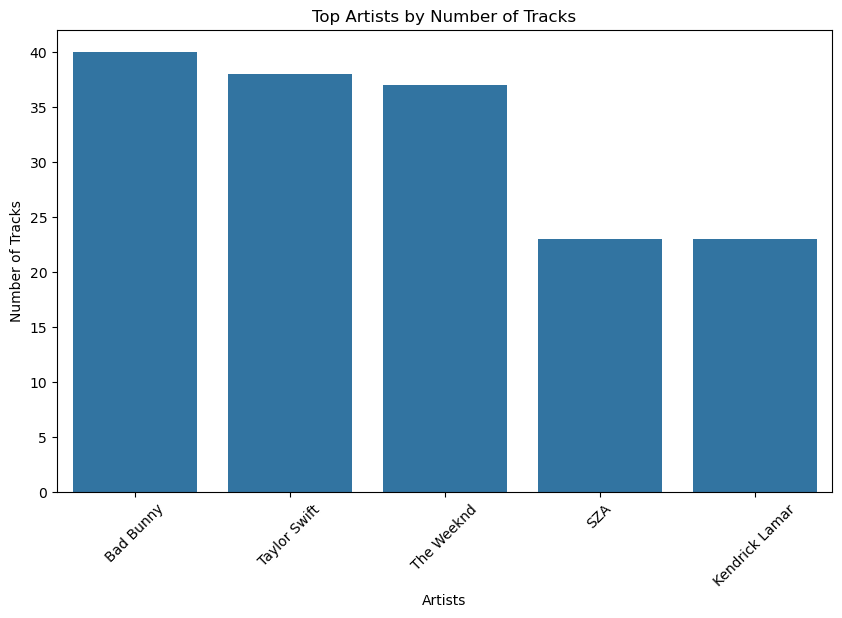

1. Bad Bunny with a total of 40 tracks.
2. Taylor Swift with a total of 38 tracks.
3. The Weeknd with a total of 37 tracks.
4. SZA with a total of 23 tracks.
5. Kendrick Lamar with a total of 23 tracks.


In [27]:
#split 'artist(s)_name' to individual names of each artist for those who did collaborations
sptfy23['artist(s)_name'] = sptfy23['artist(s)_name'].str.split(', ') 
spotify_exploded = sptfy23.explode('artist(s)_name')

#count the occurrences of each artists in the updated dataframe
top_artists = spotify_exploded['artist(s)_name'].value_counts().head()

#create a barplot to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title("Top Artists by Number of Tracks")
plt.xlabel("Artists")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

#display the exact values for each bar below
for i, (artist, count) in enumerate(top_artists.items(), start=1):
    print(f"{i}. {artist} with a total of {count} tracks.")

### Temporal Trends

##### 7. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

In [30]:
#count the no. of tracks released per year
tracks_per_year = sptfy23['released_year'].value_counts()

#sort the values in descending order
tracks_per_year.sort_values(ascending=False)

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
2003      2
1982      2
1975      2
2008      2
1991      2
1986      2
1957      2
1959      2
1995      2
1985      2
1971      1
1983      1
1992      1
1968      1
1997      1
1973      1
1930      1
1994      1
1970      1
2007      1
1952      1
1979      1
1950      1
1998      1
1996      1
1942      1
2005      1
1946      1
1987      1
Name: count, dtype: int64

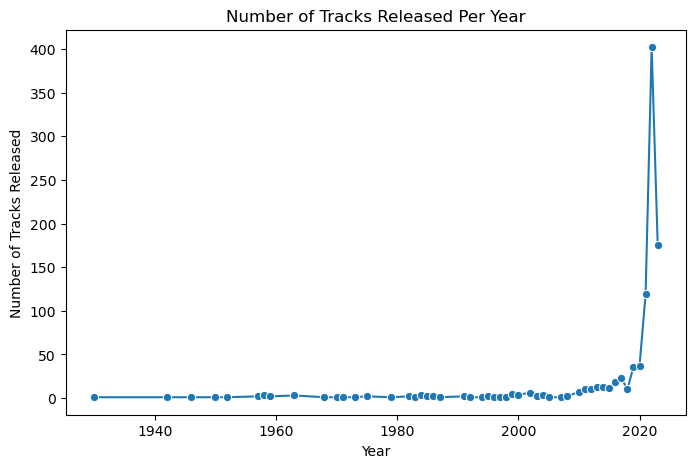

In [31]:
#create a lineplot to visualize the data above
plt.figure(figsize=(8, 5))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker = 'o')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.show()

##### 8. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

In [33]:
#count the no. of tracks released per month
tracks_per_month = sptfy23['released_month'].value_counts()

#sort the values in descending order
tracks_per_month.sort_values(ascending=False)

released_month
1     133
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64

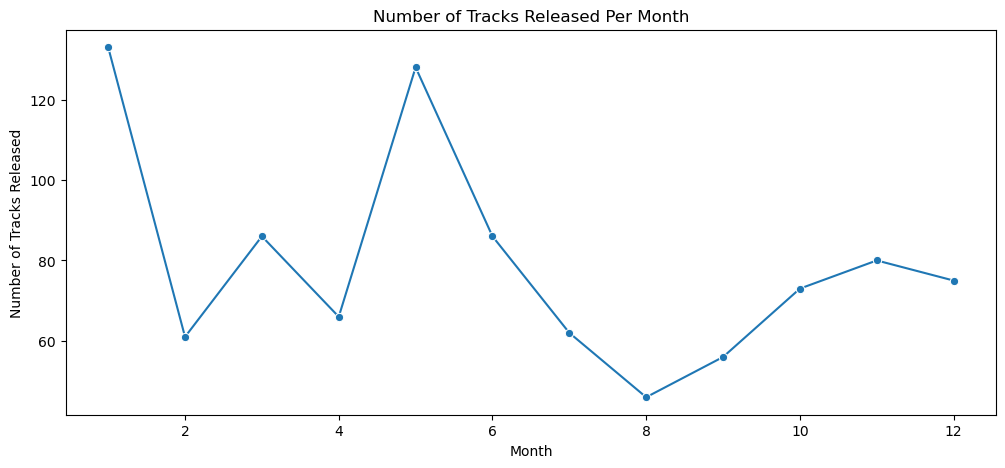

In [34]:
#create a lineplot to visualize the data above
plt.figure(figsize=(12, 5))
sns.lineplot(x=tracks_per_month.index, y=tracks_per_month.values, marker = 'o')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.show()

### Genre and Music Characteristics

##### 9. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

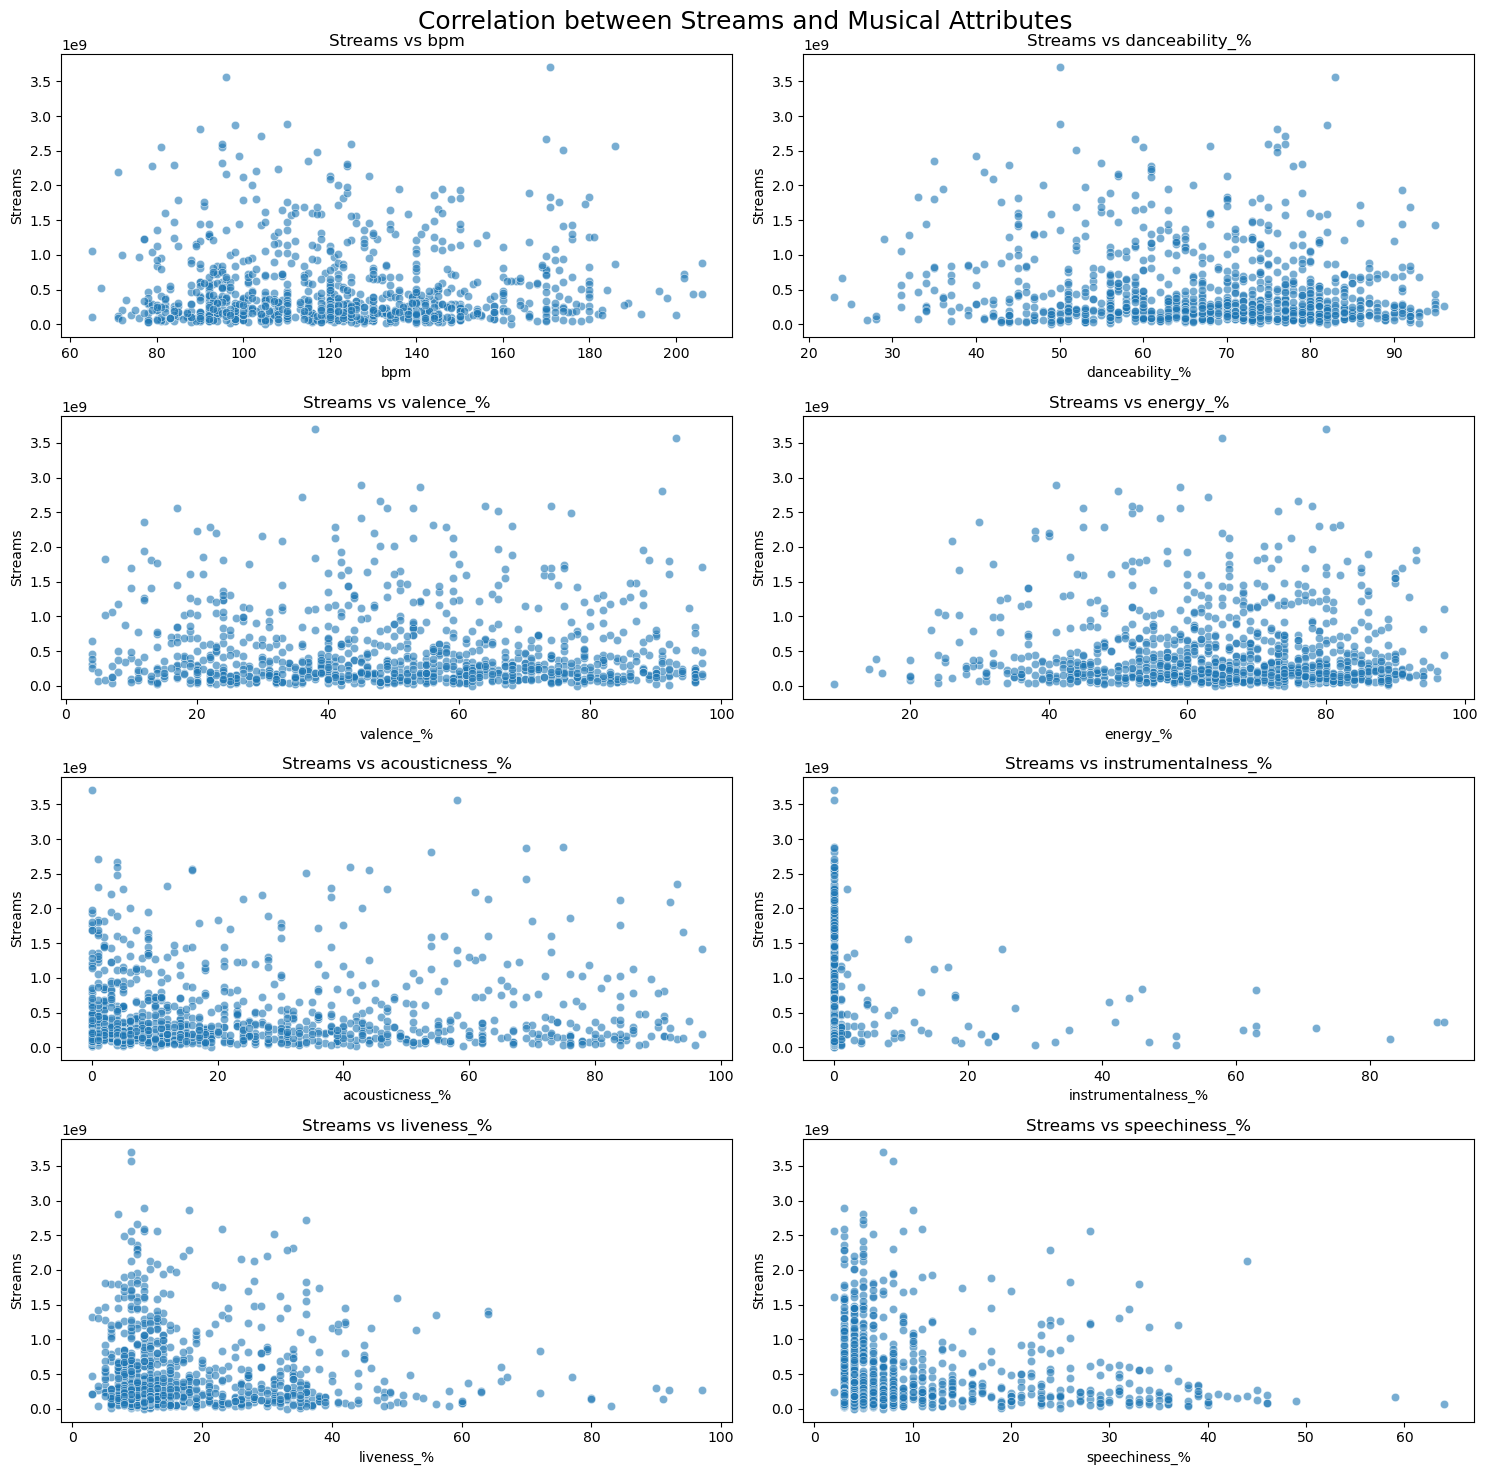

In [37]:
#create a scatterplot to visualize the correlation between streams and each musical attributes
plt.figure(figsize=(15,15))    
plt.suptitle('Correlation between Streams and Musical Attributes',fontsize=18)
plt.subplots_adjust(top=50, hspace=15) 

#list all the attributes to be used
attributes = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 
              'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, attribute in enumerate(attributes, 1): #iterate through each attribute in the list
    plt.subplot(4, 2, i)
    sns.scatterplot(data=sptfy23, x=attribute, y='streams', alpha=0.6)
    plt.title(f"Streams vs {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Streams")

plt.tight_layout()
plt.show()

##### 10.1 Is there a correlation between danceability_% and energy_%? 

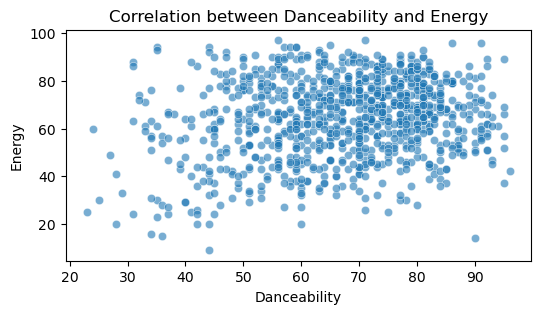

In [39]:
#create a scatterplot to visualize the correlation between danceability and enerrgy
plt.figure(figsize=(6,3))    

sns.scatterplot(data=sptfy23, x='danceability_%', y='energy_%', alpha=0.6)
plt.title("Correlation between Danceability and Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")

plt.show()

##### 10.2. How about valence_% and acousticness_%?

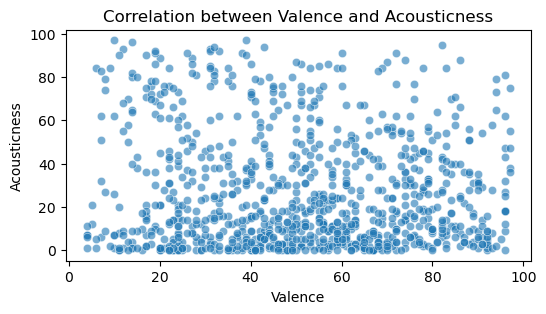

In [41]:
#create a scatterplot to visualize the correlation between valence and acousticness
plt.figure(figsize=(6,3))

sns.scatterplot(data=sptfy23, x='valence_%', y='acousticness_%', alpha=0.6)
plt.title("Correlation between Valence and Acousticness")
plt.xlabel("Valence")
plt.ylabel("Acousticness")

plt.show()

### Platform Popularity

##### 11.1 How do the numbers of tracks in spotify_playlists, deezer_playlists, and apple_playlists compare? 

In [44]:
def convertion(columns):
    for col in columns: #iterate over each column 
        sptfy23[col] = pd.to_numeric(sptfy23[col], errors='coerce') #convert to numeric; set non-numeric entries to NaN
        sptfy23.dropna(subset=[col], inplace=True) #remove rows with non-numeric entries (NaN)
        sptfy23[col] = sptfy23[col].astype('int64') #convert the data to int64

#store the list of columns to be converted in 'cols'
cols = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'] 
convertion(cols) #call the function

sptfy23.dtypes  #display the converted data types of each cols

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

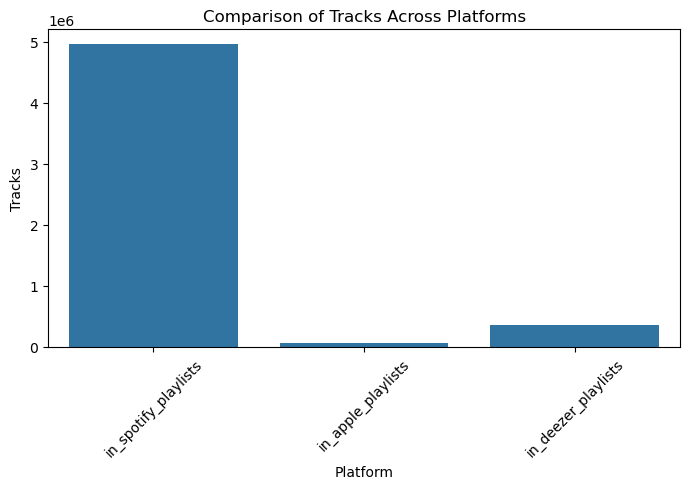

1. in_spotify_playlists = 4952842 tracks
2. in_apple_playlists = 64609 tracks
3. in_deezer_playlists = 367030 tracks


In [45]:
#create a list of all the playlist names to be analyzed
playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
#create a dictionary where the keys=names of the playlist and the value=total sum of tracks there
tracks = {platform: sptfy23[platform].sum() for platform in playlists}

#convert the dictionary into a dataframe 
compile_list = pd.DataFrame(tracks.items(), columns=['platform', 'tracks'])

#create a barplot to visualize the data
plt.figure(figsize=(7, 5))
sns.barplot(x='platform', y='tracks', data=compile_list)
plt.title("Comparison of Tracks Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Tracks")
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

#display the exact values of each bar
for i, (track, count) in enumerate(tracks.items(), start=1):
    print(f"{i}. {track} = {count} tracks")

##### 11.2. Which platform seems to favor the most popular tracks?

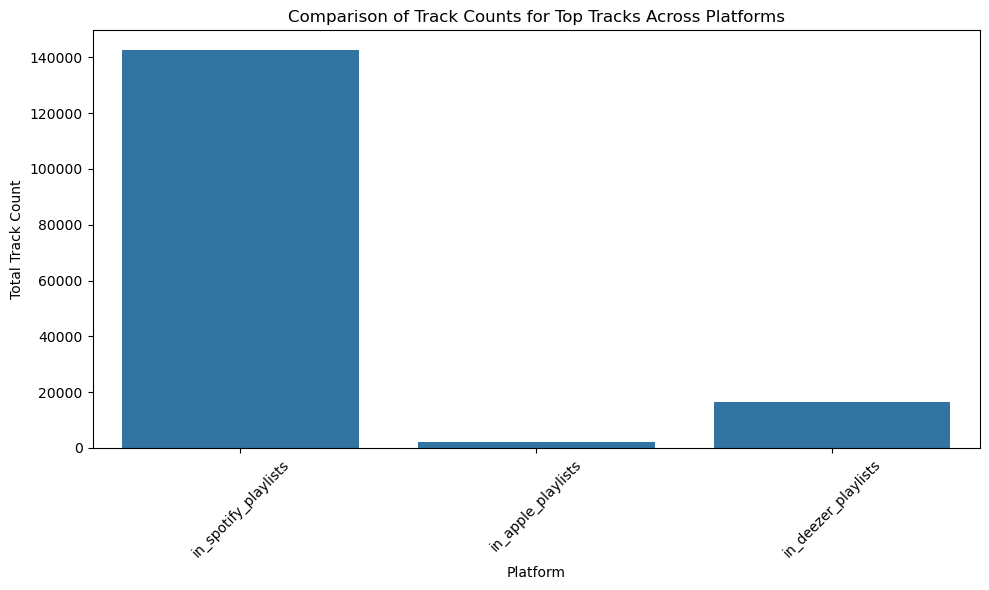

in_spotify_playlists: 142539 tracks
in_apple_playlists: 2050 tracks
in_deezer_playlists: 16467 tracks


In [47]:
#sort the values of 'high_streams' in descending order
high_streams = sptfy23.sort_values(by='streams', ascending=False)
#only take the first 5 highest tracks
top_tracks = high_streams.head()

#create a dictionary where the keys=names of the playlist and the value=total sum of tracks there
track_counts = {platform: top_tracks[platform].sum() for platform in playlists}
#convert the dictionary into a dataframe 
popular_tracks = pd.DataFrame(track_counts.items(), columns=['platform', 'track_counts'])

#create a barplot to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='track_counts', data=popular_tracks)
plt.title("Comparison of Track Counts for Top Tracks Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Total Track Count")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

#display the exact values of each bar
for index, row in popular_tracks.iterrows():
    print(f"{row['platform']}: {row['track_counts']} tracks")

### Advanced Analysis

##### 12. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

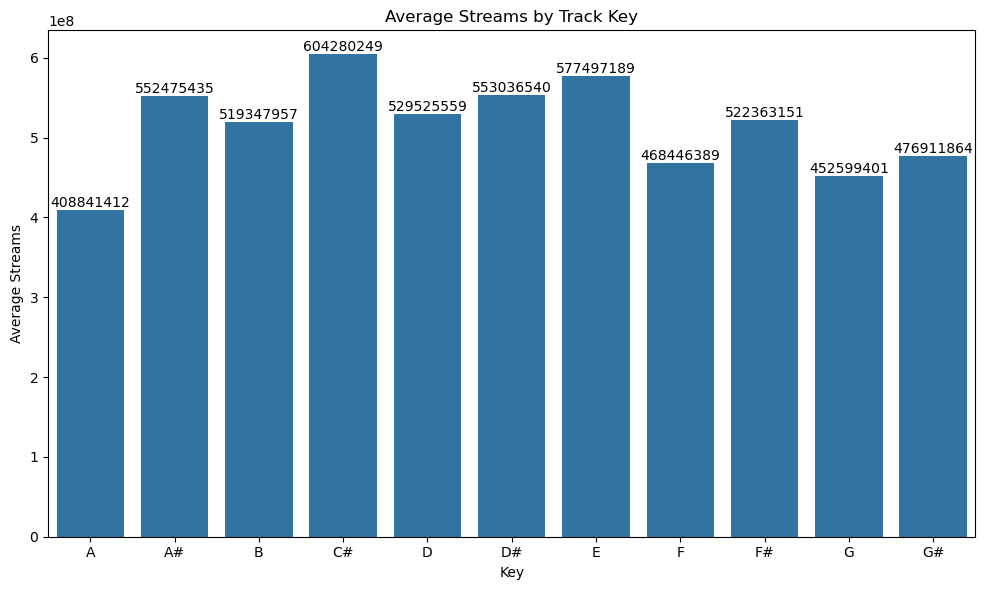

Total Number of Tracks with the Same Key
1. C# - 120 tracks
2. G - 96 tracks
3. G# - 91 tracks
4. F - 89 tracks
5. B - 81 tracks
6. D - 81 tracks
7. A - 74 tracks
8. F# - 73 tracks
9. E - 62 tracks
10. A# - 57 tracks
11. D# - 33 tracks


In [77]:
#group the values by 'key' and calculate the mean for each
average_streams_by_key = sptfy23.groupby('key')['streams'].mean()
#sort in descending order
average_streams_by_key.sort_values(ascending=False)

#create a barplot to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=average_streams_by_key.index, y=average_streams_by_key.values)
plt.title("Average Streams by Track Key")
plt.xlabel("Key")
plt.ylabel("Average Streams")

#this is to add the exact values of each bar on top of it
for index, value in enumerate(average_streams_by_key.values):
    plt.text(index, value, f"{value:.0f}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#calculate the count of tracks for each key
key_counts = sptfy23['key'].value_counts()

#display the exact values of each bar
print("Total Number of Tracks with the Same Key")
for i, (key, count) in enumerate(key_counts.items(), start=1):
    print(f"{i}. {key} - {count} tracks")

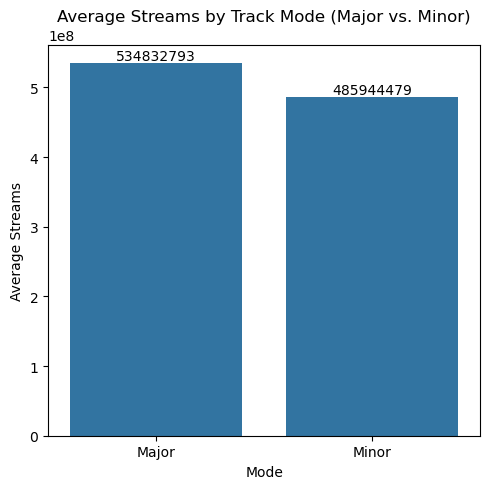

Total Number of Tracks with the Same Key
1. Major - 549 tracks
2. Minor - 403 tracks


In [87]:
#group the values by 'mode' and calculate the mean for each
average_streams_by_mode = sptfy23.groupby('mode')['streams'].mean()
#sort in descending order
average_streams_by_mode.sort_values(ascending=False)

#create a barplot to visualize the data
plt.figure(figsize=(5, 5))
sns.barplot(x=average_streams_by_mode.index, y=average_streams_by_mode.values)
plt.title("Average Streams by Track Mode (Major vs. Minor)")
plt.xlabel("Mode")
plt.ylabel("Average Streams")

#this is to add the exact values of each bar on top of it
for index, value in enumerate(average_streams_by_mode.values):
    plt.text(index, value, f"{value:.0f}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#calculate the count of tracks for each mode
mode_counts = sptfy23['mode'].value_counts()

#display the exact values of each bar
print("Total Number of Tracks with the Same Key")
for i, (mode, count) in enumerate(mode_counts.items(), start=1):
    print(f"{i}. {mode} - {count} tracks")

##### 13. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

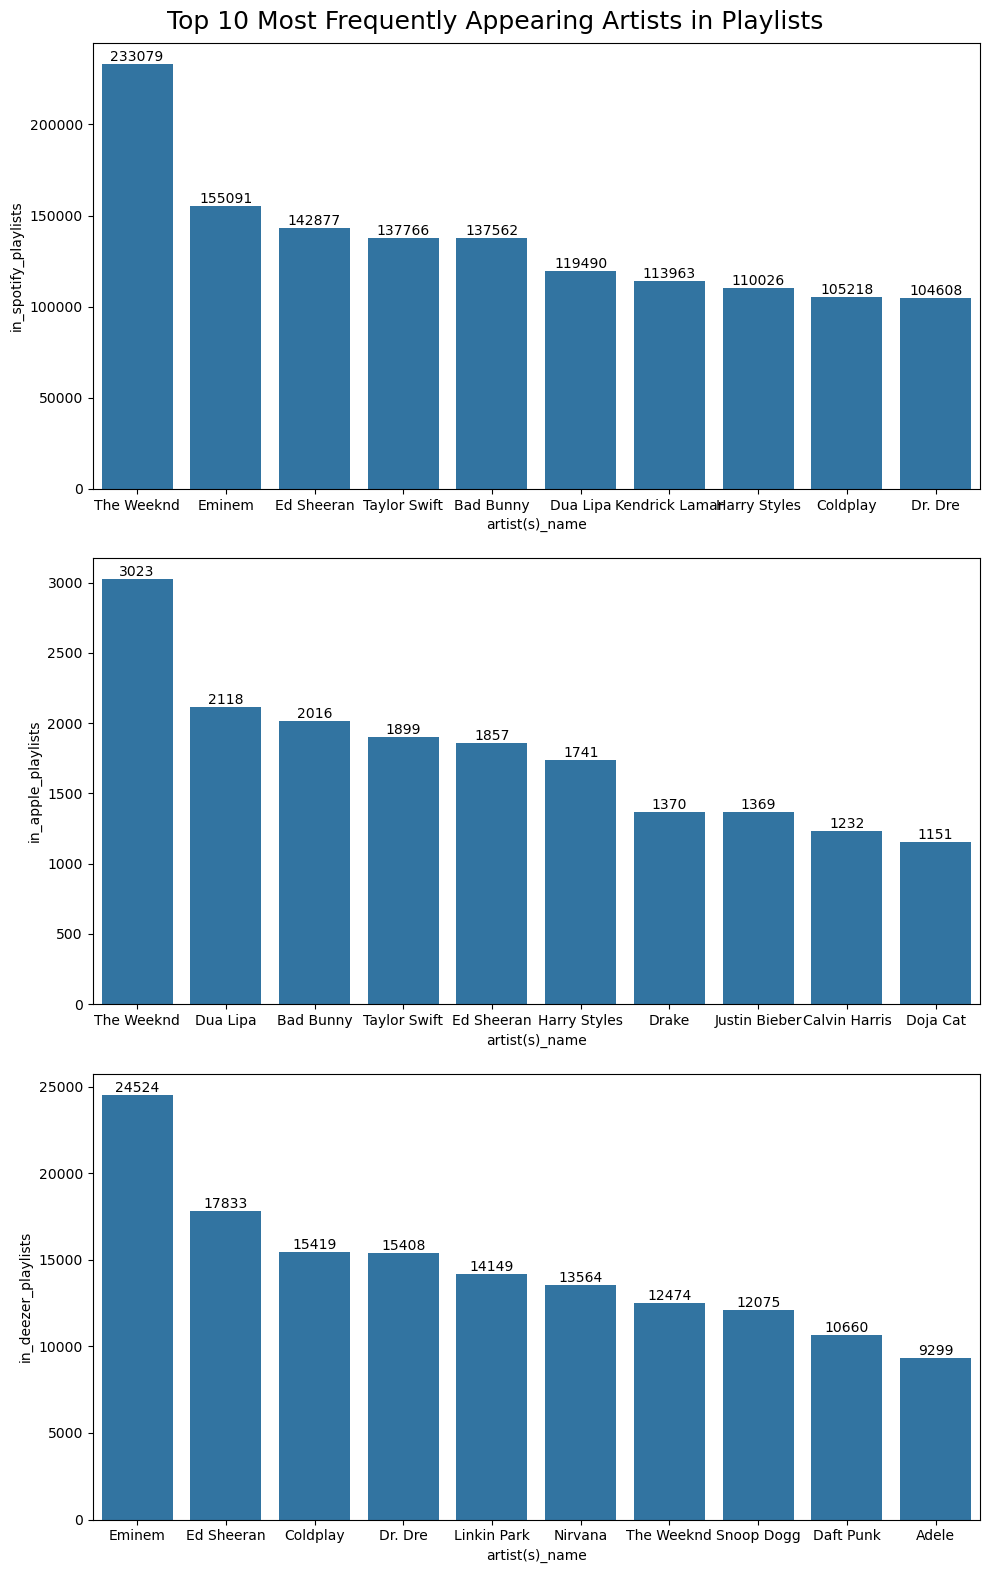

In [103]:
#create a list of all the playlists
playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

#create a barplot to visualize the data
fig, axes = plt.subplots(3, 1, figsize=(10, 16))

axes = axes.flatten()  #flatten the array to access the loop easier

plt.suptitle('Top 10 Most Frequently Appearing Artists in Playlists', fontsize=18)
plt.subplots_adjust(top=0.9, hspace=8) 

for ix, playlist in enumerate(playlists):  #iterate through each playlist in the list
    #group the data by artist name, find the total sum, and sort descendingly
    spotify_sub = spotify_exploded.groupby('artist(s)_name').sum(playlist).sort_values(playlist, ascending=False).reset_index()
    #create the barplot
    sns.barplot(x='artist(s)_name', y=playlist, data=spotify_sub.head(10), ax=axes[ix])

    #this is to add the exact values of each bar on top of it
    for p in axes[ix].patches:
        height = p.get_height()
        axes[ix].text(p.get_x() + p.get_width() / 2, height + 0.5,  
                      f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

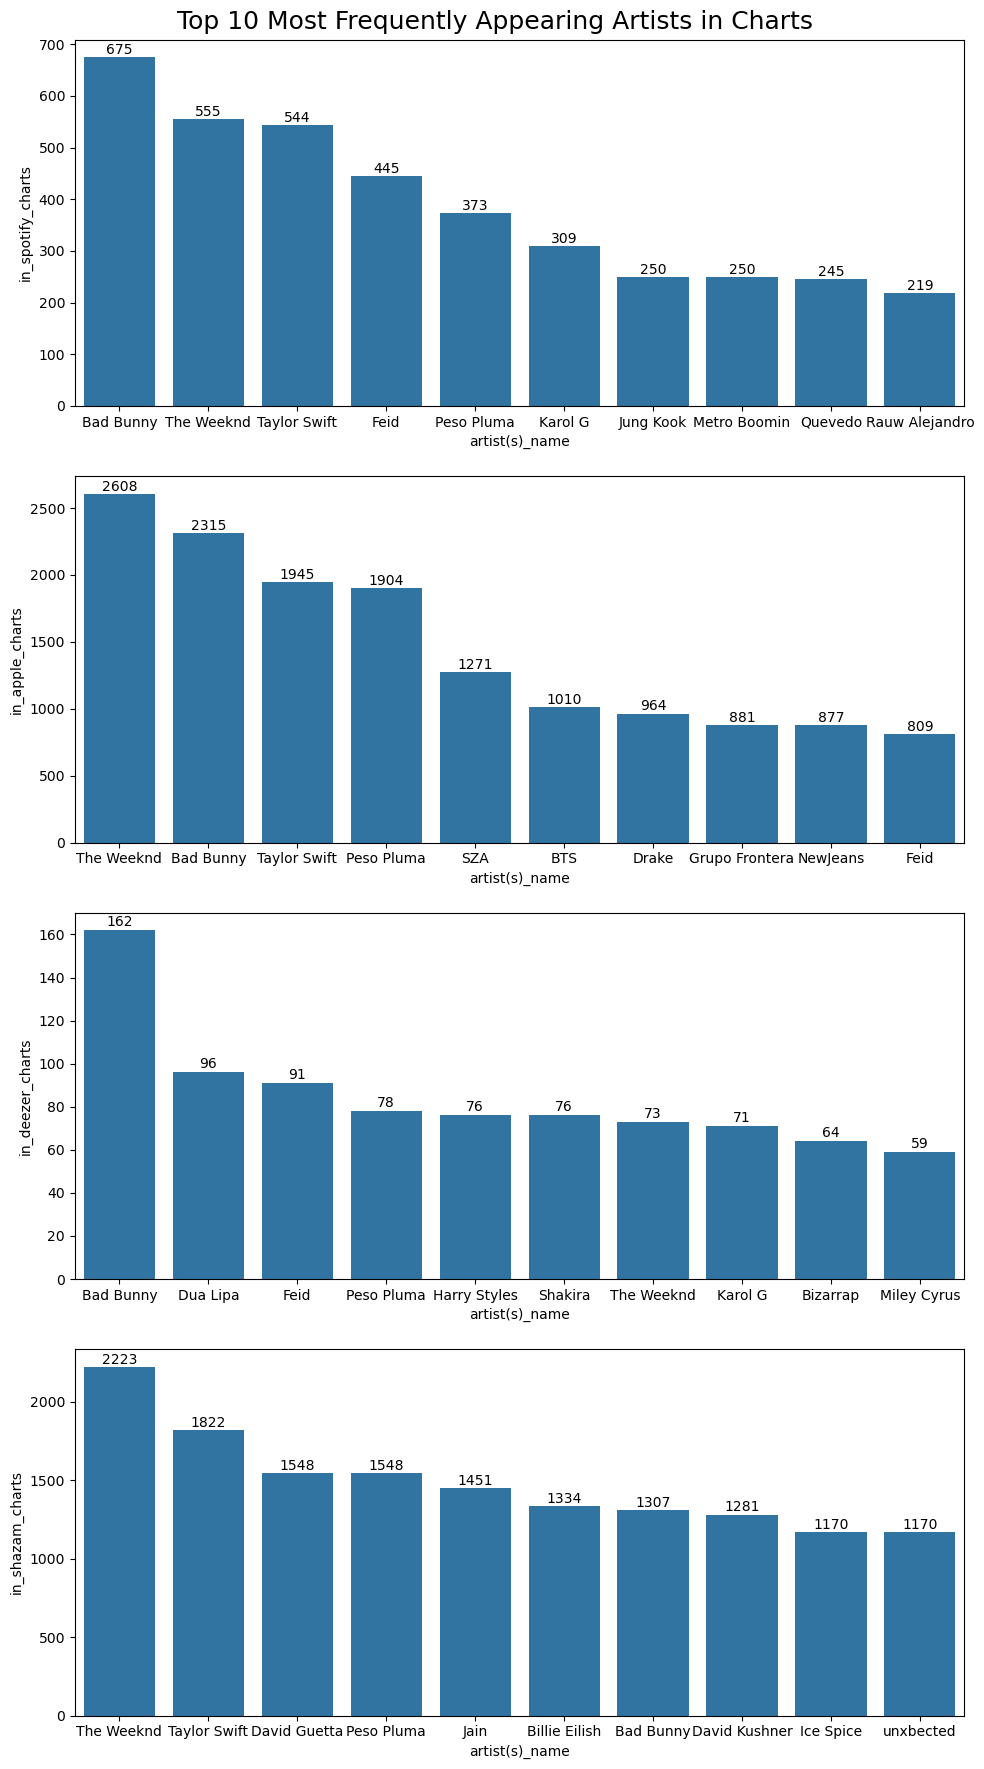

In [99]:
#create a list of all the charts
charts = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'] 

#create a barplot to visualize the data
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

axes = axes.flatten() #flatten the array to access the loop easier

plt.suptitle('Top 10 Most Frequently Appearing Artists in Charts', fontsize=18)
plt.subplots_adjust(top=0.9, hspace=8) 

for ix, chart in enumerate(charts): #iterate through each charts in the list
    #group the data by artist name, find the total sum, and sort descendingly
    spotify_sub = spotify_exploded.groupby('artist(s)_name').sum(chart).sort_values(chart, ascending=False).reset_index()
    #create the barplot
    sns.barplot(x='artist(s)_name', y=chart, data=spotify_sub.head(10), ax=axes[ix])

    #this is to add the exact values of each bar on top of it
    for p in axes[ix].patches:
        height = p.get_height()
        axes[ix].text(p.get_x() + p.get_width() / 2, height + 0.5,  
                      f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()